In this sheet we will figure out how to derotate.

given:
  3D coordinate from openface (millimeters) (these are X_#, Y_#, and Z_#)
  pose from openface (radians)

output:
  2D landmarks with the face "derotated"
  
question:
  what will we do about size, i.e. what will be the units of the output
  


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

matplotlib.rcParams.update({'font.size': 14})


source image:

<!-- <img src="test/rotated_face_output.jpg" width="300"/> -->

<img src="test/rotated_face_output.jpg" width="300"/>


landmark numbering:

<img src="test/3D_landmark_scheme_68.png" width="300"/>




In [39]:
df = pd.read_csv('test/openface2.csv', skipinitialspace=True)


[print(c, end=',') for c in df.columns]

display(df)
df[['pose_Rx','pose_Ry','pose_Rz']]

face,confidence,gaze_0_x,gaze_0_y,gaze_0_z,gaze_1_x,gaze_1_y,gaze_1_z,gaze_angle_x,gaze_angle_y,eye_lmk_x_0,eye_lmk_x_1,eye_lmk_x_2,eye_lmk_x_3,eye_lmk_x_4,eye_lmk_x_5,eye_lmk_x_6,eye_lmk_x_7,eye_lmk_x_8,eye_lmk_x_9,eye_lmk_x_10,eye_lmk_x_11,eye_lmk_x_12,eye_lmk_x_13,eye_lmk_x_14,eye_lmk_x_15,eye_lmk_x_16,eye_lmk_x_17,eye_lmk_x_18,eye_lmk_x_19,eye_lmk_x_20,eye_lmk_x_21,eye_lmk_x_22,eye_lmk_x_23,eye_lmk_x_24,eye_lmk_x_25,eye_lmk_x_26,eye_lmk_x_27,eye_lmk_x_28,eye_lmk_x_29,eye_lmk_x_30,eye_lmk_x_31,eye_lmk_x_32,eye_lmk_x_33,eye_lmk_x_34,eye_lmk_x_35,eye_lmk_x_36,eye_lmk_x_37,eye_lmk_x_38,eye_lmk_x_39,eye_lmk_x_40,eye_lmk_x_41,eye_lmk_x_42,eye_lmk_x_43,eye_lmk_x_44,eye_lmk_x_45,eye_lmk_x_46,eye_lmk_x_47,eye_lmk_x_48,eye_lmk_x_49,eye_lmk_x_50,eye_lmk_x_51,eye_lmk_x_52,eye_lmk_x_53,eye_lmk_x_54,eye_lmk_x_55,eye_lmk_y_0,eye_lmk_y_1,eye_lmk_y_2,eye_lmk_y_3,eye_lmk_y_4,eye_lmk_y_5,eye_lmk_y_6,eye_lmk_y_7,eye_lmk_y_8,eye_lmk_y_9,eye_lmk_y_10,eye_lmk_y_11,eye_lmk_y_12,eye_lmk_y_13,eye_lmk_y_14,e

,face,confidence,gaze_0_x,gaze_0_y,gaze_0_z,gaze_1_x,gaze_1_y,gaze_1_z,gaze_angle_x,gaze_angle_y,...,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c
0,0,0.975,0.103375,-0.094128,-0.990179,-0.092763,-0.064941,-0.993568,0.005,-0.08,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


,pose_Rx,pose_Ry,pose_Rz
0,-0.163,-0.119,-0.243


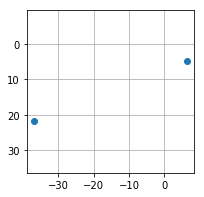

Xs = [[-36.7   6.3]]
Yz= [[21.9  4.8]]
DEROTATED
l_x -36.7


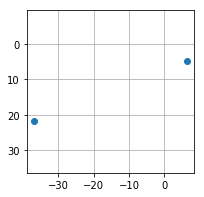

In [50]:
# which way is coordinate axes orientation

left_X = 'X_39'
left_Y = 'Y_39'
right_X = 'X_42'
right_Y = 'Y_42'

#plt.figure(figsize=[3,3])
#plt.scatter([2,4], [1,2])
#plt.axis('equal')
#plt.grid(True)
#plt.show()

#df['X_39']
plt.figure(figsize=[3,3])

plt.scatter(   
    df[[left_X, right_X]].values,
    df[[left_Y, right_Y]].values
)
plt.ylim(50, 0)
plt.axis('equal')
plt.grid(True)
plt.show()
   

print('Xs =', df[[left_X, right_X]].values)
print('Yz=', df[[left_Y, right_Y]].values)


print('DEROTATED')
l_x = df[left_X].values[0]
r_x = df[right_X].values[0]
l_y = df[left_Y].values[0]
r_y = df[right_X].values[0]

print('l_x', l_x)
l_x_new,l_y_new = derotatedXY(X=l_x, Y=l_y, Z=0, Rx=0, Ry=0, Rz=df['pose_Rz'].values[0])
r_x_new,r_y_new = derotatedXY(X=r_x, Y=r_y, Z=0, Rx=0, Ry=0, Rz=df['pose_Rz'].values[0])

print('left new = ', )

plt.figure(figsize=[3,3])

plt.scatter(   
    df[[left_X, right_X]].values,
    df[[left_Y, right_Y]].values
)
plt.ylim(50, 0)
plt.axis('equal')
plt.grid(True)
plt.show()
   



In [43]:
np.cos(np.pi/2)

6.123233995736766e-17

In [40]:
def derotatedXY(X :float,Y :float,Z :float, Rx: float, Ry: float, Rz: float):
    # lets only do Z derotation first
    newX = X * np.cos(Rz) - Y * np.sin(Rz)
    newY = X * np.sin(Rz) + Y * np.cos(Rz)
    return (newX, newY)


print(derotatedXY(1,2,3,0,0,0))


(1, 2)


In [ ]:



# ALTERNATIVE APPROACH

CONF_THRESH = 0.9
POSE_RX_THRESH = 7*np.pi/180
POSE_RX_THRESH = 7*np.pi/180
POSE_RZ_THRESH = 3*np.pi/180
#scan through the openface values
# for frame in frames:
     if (frame['confidence'] > CONF_THRESH) &&
        (frame['pose_Rx'] < POSE_RX_THRESH) && 
        (frame['pose_Ry'] < POSE_RY_THRESH) &&
        (frame['pose_Rz'] < POSE_RZ_THRESH):
            grab landmarks
            exit
            